<a href="https://colab.research.google.com/github/kgtestprojects/pythonprojectsc/blob/main/NLP_Project_Karthik_Garimella.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement**

### Business Context

The prices of the stocks of companies listed under a global exchange are influenced by a variety of factors, with the company's financial performance, innovations and collaborations, and market sentiment being factors that play a significant role. News and media reports can rapidly affect investor perceptions and, consequently, stock prices in the highly competitive financial industry. With the sheer volume of news and opinions from a wide variety of sources, investors and financial analysts often struggle to stay updated and accurately interpret its impact on the market. As a result, investment firms need sophisticated tools to analyze market sentiment and integrate this information into their investment strategies.

### Problem Definition

With an ever-rising number of news articles and opinions, an investment startup aims to leverage artificial intelligence to address the challenge of interpreting stock-related news and its impact on stock prices. They have collected historical daily news for a specific company listed under NASDAQ, along with data on its daily stock price and trade volumes.

As a member of the Data Science and AI team in the startup, you have been tasked with analyzing the data, developing an AI-driven sentiment analysis system that will automatically process and analyze news articles to gauge market sentiment, and summarizing the news at a weekly level to enhance the accuracy of their stock price predictions and optimize investment strategies. This will empower their financial analysts with actionable insights, leading to more informed investment decisions and improved client outcomes.

### Data Dictionary

* `Date` : The date the news was released
* `News` : The content of news articles that could potentially affect the company's stock price
* `Open` : The stock price (in \$) at the beginning of the day
* `High` : The highest stock price (in \$) reached during the day
* `Low` :  The lowest stock price (in \$) reached during the day
* `Close` : The adjusted stock price (in \$) at the end of the day
* `Volume` : The number of shares traded during the day
* `Label` : The sentiment polarity of the news content
    * 1: positive
    * 0: neutral
    * -1: negative

## **Installing and Importing the necessary libraries**

In [ ]:
# installing the libraries
!pip install -U sentence-transformers==4.0.2 gensim==4.3.3 transformers==4.50.3 tqdm==4.67.1 scikit-learn==1.6.1 pandas==2.2.2 numpy==1.26.4 matplotlib==3.10.0 seaborn==0.13.2 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.6/340.6 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 87.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 120.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 74.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# To manipulate and analyze data
import pandas as pd
import numpy as np

# To visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# To used time-related functions
import time

# To parse JSON data
import json

# To build, tune, and evaluate ML models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# To load/create word embeddings
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

# To work with transformer models
import torch
from sentence_transformers import SentenceTransformer

# To implement progress bar related functionalities
from tqdm import tqdm
tqdm.pandas()

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

## **Loading the dataset**

In [ ]:
# Importing necessary file to begin data analysis.
# Due to my drive settings, I prefer to upload the file from my laptop
from google.colab import files

# Open file dialog to upload a file
uploaded = files.upload()

Saving stock_news.csv to stock_news.csv


In [ ]:
#Move contents of file to a dataframe
stock_news = pd.read_csv('stock_news.csv')


In [ ]:
#Creating a copy of the dataset
stock = stock_news.copy()

## **Data Overview**

### Displaying the first few rows of the dataset

In [ ]:
stock.head()

,Date,News,Open,High,Low,Close,Volume,Label
0,2019-01-02,The tech sector experienced a significant dec...,41.740002,42.244999,41.482498,40.246914,130672400,-1
1,2019-01-02,Apple lowered its fiscal Q1 revenue guidance ...,41.740002,42.244999,41.482498,40.246914,130672400,-1
2,2019-01-02,Apple cut its fiscal first quarter revenue fo...,41.740002,42.244999,41.482498,40.246914,130672400,-1
3,2019-01-02,This news article reports that yields on long...,41.740002,42.244999,41.482498,40.246914,130672400,-1
4,2019-01-02,Apple's revenue warning led to a decline in U...,41.740002,42.244999,41.482498,40.246914,130672400,-1


### Understanding the shape of the dataset

In [ ]:
stock.shape

(349, 8)

### Checking the data types of the columns

In [ ]:
#Datatypes of the different columns
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    349 non-null    object 
 1   News    349 non-null    object 
 2   Open    349 non-null    float64
 3   High    349 non-null    float64
 4   Low     349 non-null    float64
 5   Close   349 non-null    float64
 6   Volume  349 non-null    int64  
 7   Label   349 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 21.9+ KB


In [ ]:
#Converting date to datetime format
stock['Date'] = pd.to_datetime(stock['Date'])

In [ ]:
#Confirming the date format
stock.head()

,Date,News,Open,High,Low,Close,Volume,Label
0,2019-01-02,The tech sector experienced a significant dec...,41.740002,42.244999,41.482498,40.246914,130672400,-1
1,2019-01-02,Apple lowered its fiscal Q1 revenue guidance ...,41.740002,42.244999,41.482498,40.246914,130672400,-1
2,2019-01-02,Apple cut its fiscal first quarter revenue fo...,41.740002,42.244999,41.482498,40.246914,130672400,-1
3,2019-01-02,This news article reports that yields on long...,41.740002,42.244999,41.482498,40.246914,130672400,-1
4,2019-01-02,Apple's revenue warning led to a decline in U...,41.740002,42.244999,41.482498,40.246914,130672400,-1


### Checking the statistical summary

In [ ]:
stock.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Date,349,NaN,NaN,NaN,2019-02-16 16:05:30.085959936,2019-01-02 00:00:00,2019-01-14 00:00:00,2019-02-05 00:00:00,2019-03-22 00:00:00,2019-04-30 00:00:00,NaN
News,349,349,The tech sector experienced a significant dec...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Open,349.0,NaN,NaN,NaN,46.229233,37.567501,41.740002,45.974998,50.7075,66.817497,6.442817
High,349.0,NaN,NaN,NaN,46.700458,37.817501,42.244999,46.025002,50.849998,67.0625,6.507321
Low,349.0,NaN,NaN,NaN,45.745394,37.305,41.482498,45.639999,49.7775,65.862503,6.391976
Close,349.0,NaN,NaN,NaN,44.926317,36.254131,40.246914,44.596924,49.11079,64.805229,6.398338
Volume,349.0,NaN,NaN,NaN,128948236.103152,45448000.0,103272000.0,115627200.0,151125200.0,244439200.0,43170314.918964
Label,349.0,NaN,NaN,NaN,-0.054441,-1.0,-1.0,0.0,0.0,1.0,0.715119


### Checking the duplicate values

In [ ]:
# Check for duplicate values
stock.duplicated().sum()

0

### Checking for missing values

In [ ]:
stock.isnull().sum() # Check for missing values

,0
Date,0
News,0
Open,0
High,0
Low,0
Close,0
Volume,0
Label,0


# Observations



1.   349 unique news articles in the dataset.
2.   Clean dataset - no null or missing values.
3.   With a mean sentiment of -0.054441, safe to assume that sentment in the dataset tends to be more negative than positive.




## **Exploratory Data Analysis**

### Univariate Analysis

#### Observations on Label

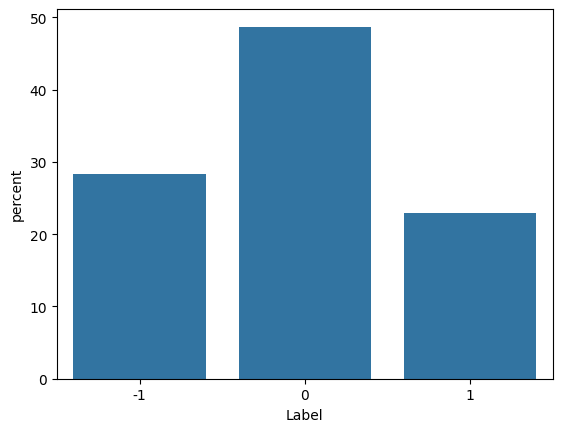

In [ ]:
#Analysis of label (sentiment)
sns.countplot(data=stock, x="Label", stat="percent");

#### Density Plot of Price (Open,High,Low,Close)

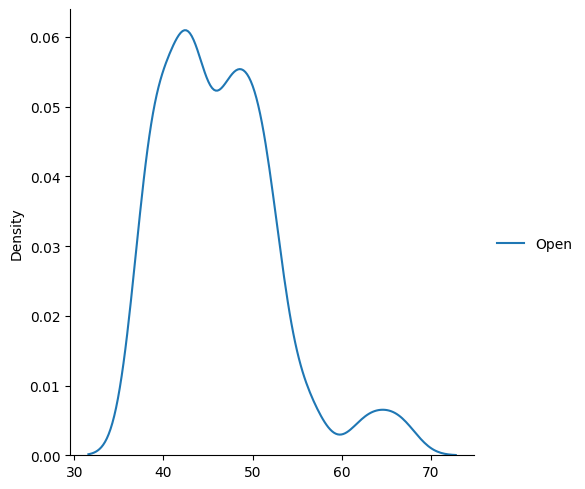

In [ ]:
#Checking prices across different dimensions
sns.displot(data=stock[['Open']], kind="kde", palette="tab10");

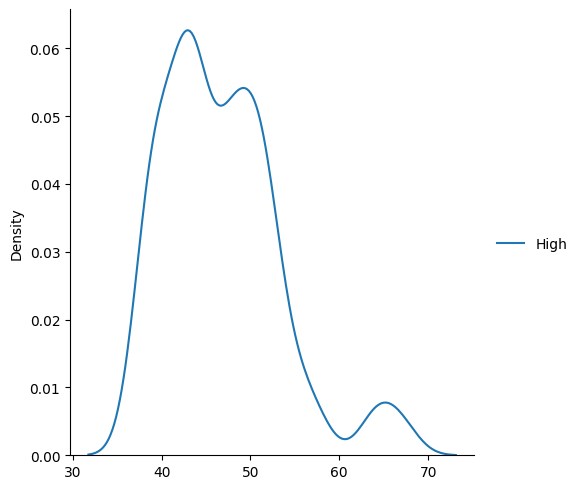

In [ ]:
sns.displot(data=stock[['High']], kind="kde", palette="tab10");

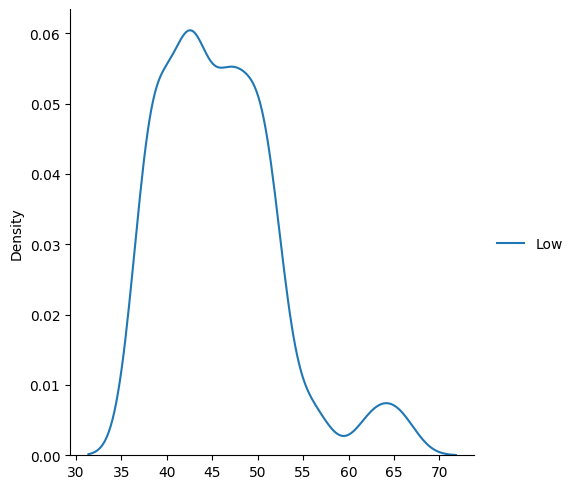

In [ ]:
sns.displot(data=stock[['Low']], kind="kde", palette="tab10");

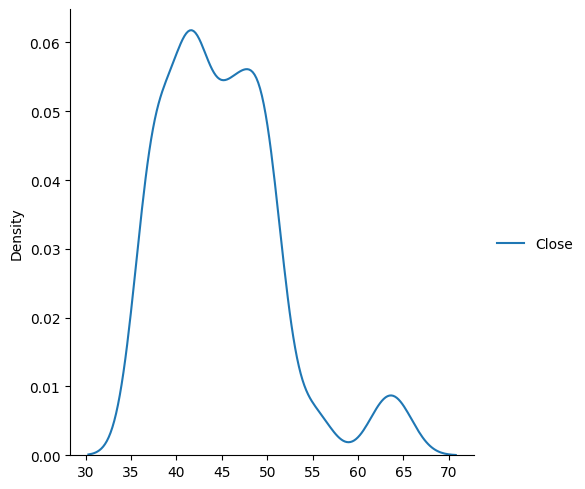

In [ ]:
sns.displot(data=stock[['Close']], kind="kde", palette="tab10");

#### Observations on Volume

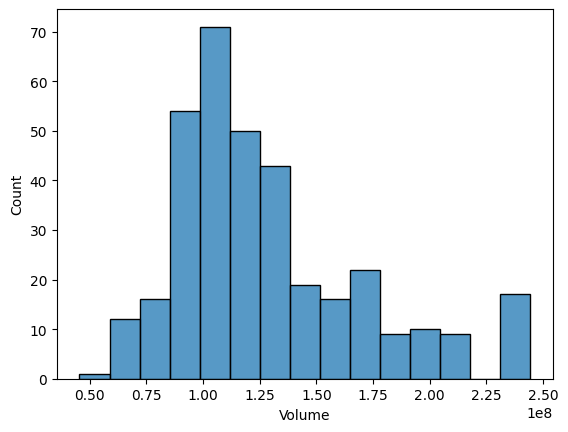

In [ ]:
sns.histplot(stock, x='Volume'); #Checking volume of transactions

#### Observations on News length

In [ ]:
#Calculating the total number of words present in the news content.
stock['news_len'] = stock['News'].apply(lambda x: len(x.split(' ')))

 #Complete the code to print the statistical summary for the news content length
stock['news_len'].describe()

,news_len
count,349.000000
mean,49.312321
std,5.727770
min,19.000000
25%,46.000000
50%,50.000000
75%,53.000000
max,61.000000


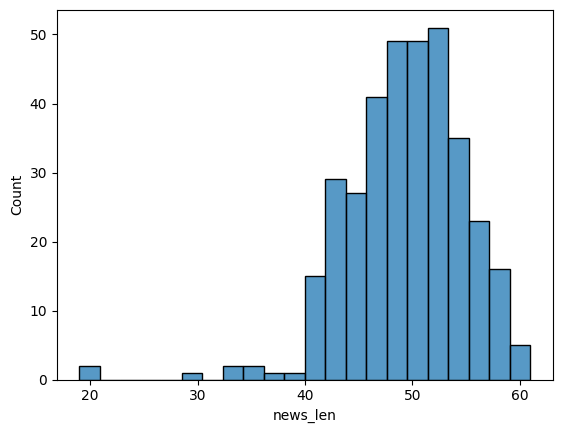

In [ ]:
sns.histplot(data=stock,x="news_len"); #Complete the code to plot a histogram of news_len column

# Observations



1.   Majority class is neutral, followed by negative, and then positive sentiment.
2.   Average of about 50 words, with a few as low as 20 and a high of 60 words.
3. Significant swing in volume and price data - something to consider.



### Bivariate Analysis

#### Correlation

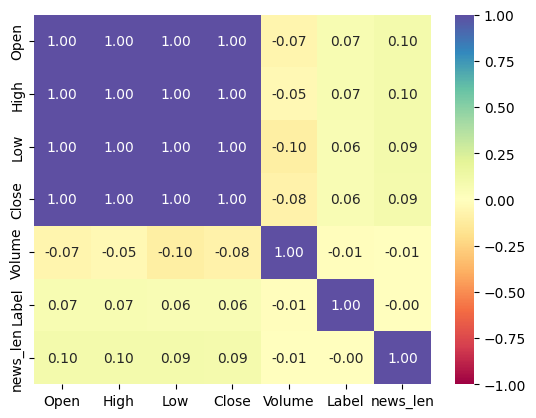

In [ ]:
#Correlation of variables
# Compute correlation matrix for numeric columns only
corr_matrix = stock.corr(numeric_only=True)

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Label vs Price (Open, High, Low, Close)

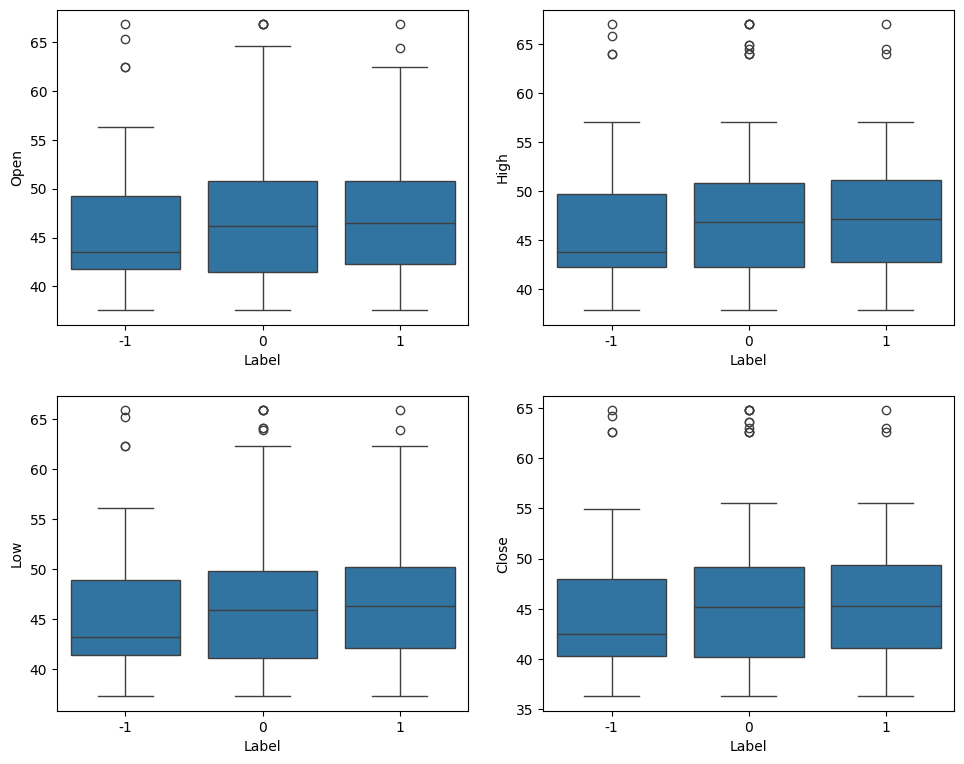

In [ ]:
plt.figure(figsize=(10, 8))

for i, variable in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=stock, x="Label", y=variable)
    plt.tight_layout(pad=2)

plt.show()

#### Label vs Volume

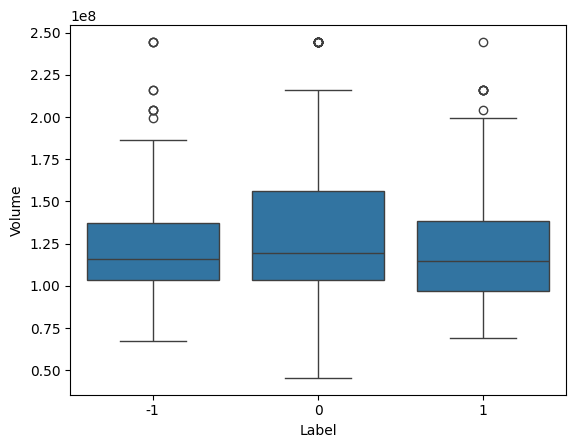

In [ ]:
#Understanding the label (sentiment) and volume
sns.boxplot(
    data=stock, x="Label", y="Volume"
);

#### Date vs Price (Open, High, Low, Close)

In [ ]:
#plotting stock price based on date
stock_daily = stock.groupby('Date').agg(
    {
        'Open': 'mean',
        'High': 'mean',
        'Low': 'mean',
        'Close': 'mean',
        'Volume': 'mean',
    }
).reset_index()  # Group the 'stocks' DataFrame by the 'Date' column

stock_daily.set_index('Date', inplace=True)
stock_daily.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-01-02,41.740002,42.244999,41.482498,40.246914,130672400.0
2019-01-03,43.570000,43.787498,43.222500,42.470604,103544800.0
2019-01-04,47.910000,47.919998,47.095001,46.419842,111448000.0
2019-01-07,50.792500,51.122501,50.162498,49.110790,109012000.0
2019-01-08,53.474998,54.507500,51.685001,50.787209,216071600.0


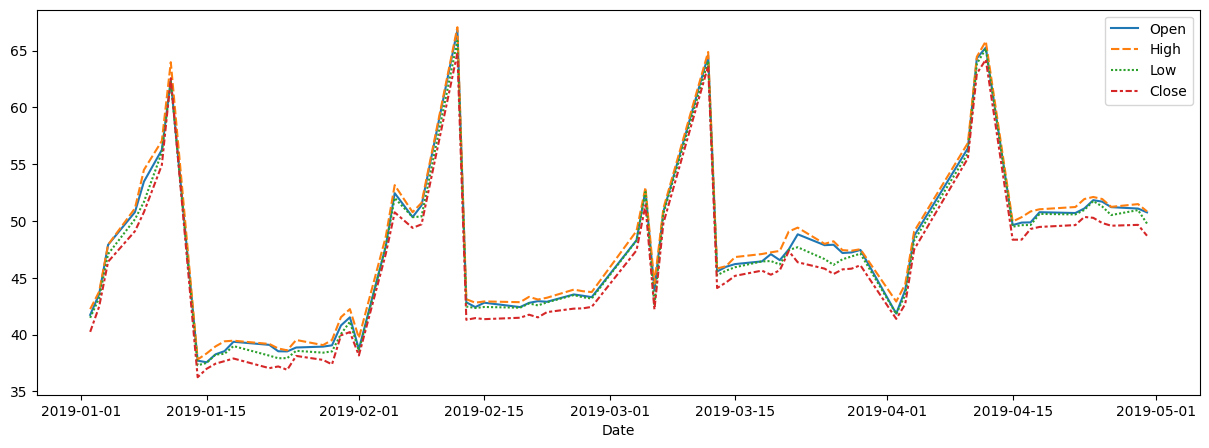

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(stock_daily.drop("Volume", axis=1));

#### Volume vs Close Price

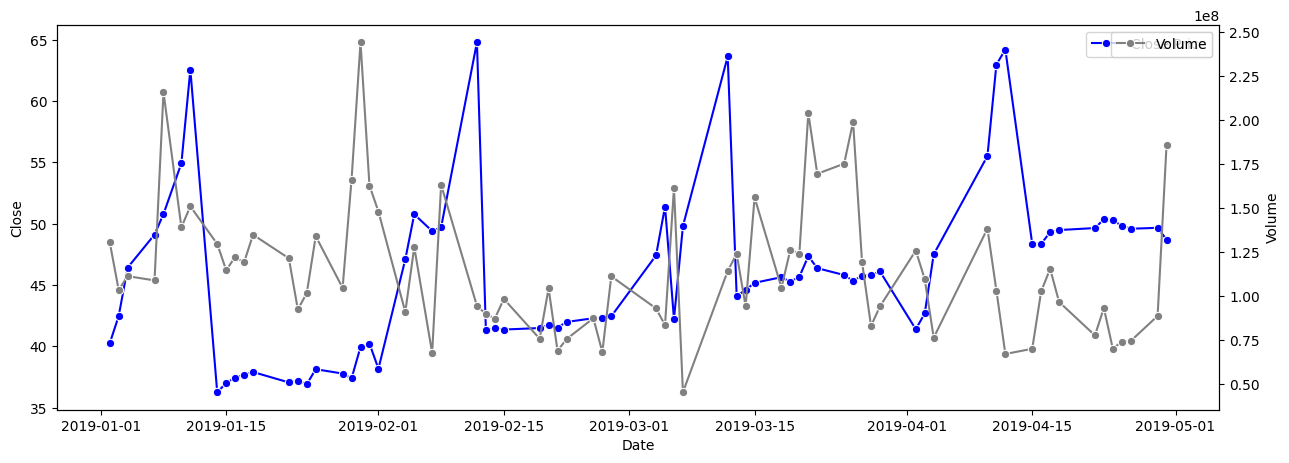

In [ ]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(15,5))

# Lineplot on primary y-axis
sns.lineplot(data=stock_daily.reset_index(), x='Date', y='Close', ax=ax1, color='blue', marker='o', label='Close Price')

# Create a secondary y-axis
ax2 = ax1.twinx()

# Lineplot on secondary y-axis
sns.lineplot(data=stock_daily.reset_index(), x='Date', y='Volume', ax=ax2, color='gray', marker='o', label='Volume')

ax1.legend(bbox_to_anchor=(1,1));

# Observations



1.   Median volume roughly similar across news with different sentiment.
2.   Spikes in volumes don't always corelate to stock price highs or lows. ATH (all time high) stock price was during a period of low voume (late Jan 2019).
3. As expected, median stock prices (open, close, high) were lower on days with negative sentiment news.




## **Data Preprocessing**

In [ ]:
stock["Date"].describe() #Complete the code to print the statistical summary of the 'Date' column

,Date
count,349
mean,2019-02-16 16:05:30.085959936
min,2019-01-02 00:00:00
25%,2019-01-14 00:00:00
50%,2019-02-05 00:00:00
75%,2019-03-22 00:00:00
max,2019-04-30 00:00:00


### Train-test-validation Split

In [ ]:
# Splitting the data into test-train-validate based on date criteria (as seen in one of the notebooks)
X_train = stock[(stock['Date'] < '2019-04-01 00:00:00')].reset_index()
X_val = stock[(stock['Date'] >= '2019-04-01 00:00:00') & (stock['Date'] < '2019-04-16 00:00:00')].reset_index()
X_test = stock[stock['Date'] >= '2019-04-16 00:00:00'].reset_index()

In [ ]:
# Setting Label to the target variable
y_train = X_train["Label"].copy()
y_val = X_val["Label"].copy()
y_test = X_test["Label"].copy()

#Dropping label from the X tables
X_train = X_train.drop(columns=['Label'])
X_val = X_val.drop(columns=['Label'])
X_test = X_test.drop(columns=['Label'])

In [ ]:
#Complete the code to print the shape of X_train,X_val,X_test,y_train,y_val and y_test
print("Train data shape",X_train.shape)
print("Validation data shape",X_val.shape)
print("Test data shape ",X_test.shape)

print("Train label shape",y_train.shape)
print("Validation label shape",y_val.shape)
print("Test label shape ",y_test.shape)

Train data shape (286, 9)
Validation data shape (21, 9)
Test data shape  (42, 9)
Train label shape (286,)
Validation label shape (21,)
Test label shape  (42,)


## **Word Embeddings**

### Word2Vec

In [ ]:
# Creating a list of all words in our data
words_list = [item.split(" ") for item in stock['News'].values]

In [ ]:
# Creating an instance of Word2Vec
vec_size = 300
model_W2V = Word2Vec(words_list, vector_size = vec_size, min_count = 1, window=5, workers = 6)

In [ ]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(list(model_W2V.wv.key_to_index)))

Length of the vocabulary is 4682


Let's check out a few word embeddings obtained using the model.

In [ ]:
# Checking the word embedding of a random word
word = "stock"
model_W2V.wv[word]

array([ 3.26096383e-03,  4.36060615e-02,  6.05693180e-03,  2.36993302e-02,
       -3.43509531e-03, -5.05899750e-02,  3.52946557e-02,  8.43748376e-02,
        9.51223541e-03, -1.52325351e-02,  1.18964165e-02, -2.26723142e-02,
        8.97050777e-04,  1.20956143e-02, -2.89853252e-02, -2.53123119e-02,
        2.13268884e-02, -1.26829697e-02, -2.31495989e-03, -1.32812867e-02,
       -2.75976453e-02,  3.33799864e-03,  3.68427821e-02,  7.86619633e-03,
        1.45420525e-02,  6.04168652e-03, -4.48497646e-02,  6.14670711e-03,
       -1.80912502e-02, -3.56268287e-02,  1.43549377e-02, -2.18509473e-02,
        3.10570979e-03, -3.09410319e-03, -5.23246406e-03,  1.67566277e-02,
        1.73098128e-02, -3.84881571e-02,  1.66607869e-03, -1.06260553e-02,
       -1.62526611e-02, -1.19165506e-03, -2.02978868e-03, -2.56955065e-02,
        1.60180740e-02,  4.00837772e-02, -2.18481233e-04,  1.05257230e-02,
       -1.81655819e-03,  2.72785183e-02,  1.99048407e-02,  4.91370261e-03,
       -1.61632523e-02,  

In [ ]:
# Checking the word embedding of a random word
word = "economy"
model_W2V.wv[word]

array([ 2.4252376e-03,  6.2835980e-03,  9.5230957e-05,  3.4880685e-03,
       -2.4864681e-03, -8.5184043e-03,  8.5126245e-03,  1.5530461e-02,
        3.9040615e-04, -1.3580698e-03,  2.4763835e-03, -4.5762830e-03,
        6.8457075e-04,  2.0091501e-03, -4.7642440e-03, -3.2825710e-03,
        2.2944026e-03, -3.3569839e-03, -6.2356232e-04, -3.8304974e-03,
       -1.2983120e-03,  1.7443724e-03,  5.0899568e-03,  2.3587847e-03,
        4.5327768e-03,  1.5867504e-03, -4.5880340e-03, -1.3841903e-03,
       -2.4155288e-03, -5.6868307e-03,  3.0111242e-03, -2.0721089e-03,
        3.1014401e-03, -1.7412218e-03,  1.1937384e-04,  3.5158484e-03,
        1.4763620e-03, -2.9417477e-03,  5.3389504e-04, -1.7928493e-03,
       -4.7162748e-03,  5.8138953e-04,  1.3037124e-03, -5.0490620e-03,
       -1.0657574e-03,  6.7288326e-03, -1.7266874e-03,  5.0005782e-03,
       -2.8280595e-03,  5.8442531e-03,  6.1293523e-04, -1.7882399e-04,
       -2.2220341e-03,  1.1499362e-03, -2.6947258e-03,  5.2949311e-03,
      

In [ ]:
# Retrieving the words present in the Word2Vec model's vocabulary
words = list(model_W2V.wv.key_to_index.keys())

# Retrieving word vectors for all the words present in the model's vocabulary
wvs = model_W2V.wv[words].tolist()

# Creating a dictionary of words and their corresponding vectors
word_vector_dict = dict(zip(words, wvs))

In [ ]:
def average_vectorizer_Word2Vec(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [ ]:
# creating a dataframe of the vectorized documents
start = time.time()

X_train_wv = pd.DataFrame(X_train["News"].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
X_val_wv = pd.DataFrame(X_val["News"].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
X_test_wv = pd.DataFrame(X_test["News"].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])

end = time.time()
print('Time taken ', (end-start))

Time taken  0.532221794128418


In [ ]:
print(X_train_wv.shape, X_val_wv.shape, X_test_wv.shape)

(286, 300) (21, 300) (42, 300)


### GloVe

In [ ]:
#Downloading the file as the project file had an issue
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2025-05-10 02:35:19--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-05-10 02:35:20--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-05-10 02:35:20--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
# load the Stanford GloVe model
filename = 'glove.6B.100d.txt' #Updated filename
glove_model = KeyedVectors.load_word2vec_format(filename, binary=False, no_header=True) # Setting no_header=True

In [ ]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(glove_model.index_to_key))

Length of the vocabulary is 400000


Let's check out a few word embeddings.

In [ ]:
# Checking the word embedding of a random word
word = "stock"
glove_model[word]

array([ 8.6341e-01,  6.9648e-01,  4.5794e-02, -9.5708e-03, -2.5498e-01,
       -7.4666e-01, -2.2086e-01, -4.4615e-01, -1.0423e-01, -9.9931e-01,
        7.2550e-02,  4.5049e-01, -5.9912e-02, -5.7837e-01, -4.6540e-01,
        4.3429e-02, -5.0570e-01, -1.5442e-01,  9.8250e-01, -8.1571e-02,
        2.6523e-01, -2.3734e-01,  9.7675e-02,  5.8588e-01, -1.2948e-01,
       -6.8956e-01, -1.2811e-01, -5.2265e-02, -6.7719e-01,  3.0190e-02,
        1.8058e-01,  8.6121e-01, -8.3206e-01, -5.6887e-02, -2.9578e-01,
        4.7180e-01,  1.2811e+00, -2.5228e-01,  4.9557e-02, -7.2455e-01,
        6.6758e-01, -1.1091e+00, -2.0493e-01, -5.8669e-01, -2.5375e-03,
        8.2777e-01, -4.9102e-01, -2.6475e-01,  4.3015e-01, -2.0516e+00,
       -3.3208e-01,  5.1845e-02,  5.2646e-01,  8.7452e-01, -9.0237e-01,
       -1.7366e+00, -3.4727e-01,  1.6590e-01,  2.7727e+00,  6.5756e-02,
       -4.0363e-01,  3.8252e-01, -3.0787e-01,  5.9202e-01,  1.3468e-01,
       -3.3851e-01,  3.3646e-01,  2.0950e-01,  8.5905e-01,  5.18

In [ ]:
# Checking the word embedding of a random word
word = "economy"
glove_model[word]

array([-0.19382  ,  1.017    ,  1.076    ,  0.02954  , -0.39192  ,
       -1.3891   , -0.87873  , -0.63162  ,  0.9643   , -0.43035  ,
       -0.34868  ,  0.22736  , -0.40296  ,  0.15641  , -0.16813  ,
       -0.15343  , -0.15799  , -0.27612  ,  0.18088  , -0.28386  ,
        0.49847  ,  0.29864  ,  0.32353  ,  0.18108  , -0.59623  ,
       -0.54165  , -0.70019  , -0.64956  , -0.69063  ,  0.18084  ,
       -0.38581  ,  0.56086  , -0.40313  , -0.38777  , -0.70615  ,
        0.20657  ,  0.34171  , -0.23393  , -0.35882  , -0.2201   ,
       -0.76182  , -1.2047   ,  0.4339   ,  1.1656   ,  0.1836   ,
       -0.21601  ,  0.93198  , -0.059616 , -0.11624  , -1.3259   ,
       -0.79772  , -0.0074957, -0.0889   ,  1.4749   ,  0.31157  ,
       -2.2952   , -0.058351 ,  0.39353  ,  1.4983   ,  0.74023  ,
       -0.20109  ,  0.098124 , -0.73081  , -0.32294  ,  0.16703  ,
        0.87431  , -0.041624 , -0.51022  ,  1.0737   , -0.4257   ,
        1.0581   ,  0.19859  , -0.60087  , -0.33906  ,  0.6024

In [ ]:
# Retrieving the words present in the GloVe model's vocabulary
glove_words = glove_model.index_to_key

# Creating a dictionary of words and their corresponding vectors
glove_word_vector_dict = dict(zip(glove_model.index_to_key,list(glove_model.vectors)))

In [ ]:
vec_size=100

In [ ]:
def average_vectorizer_GloVe(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in glove_words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(glove_word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [ ]:
# creating a dataframe of the vectorized documents
start = time.time()

X_train_gl = pd.DataFrame(X_train["News"].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
X_val_gl = pd.DataFrame(X_val["News"].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
X_test_gl = pd.DataFrame(X_test["News"].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])

end = time.time()
print('Time taken ', (end-start))

Time taken  28.40170407295227


In [ ]:
#Summary of dataframes
print(X_train_gl.shape, X_val_gl.shape, X_test_gl.shape)

(286, 100) (21, 100) (42, 100)


### Sentence Transformer

#### Defining the model

In [ ]:
#Defining the model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

#### Encoding the dataset

In [ ]:
# setting the device to GPU if available, else CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# encoding the dataset
start = time.time()

X_train_st = model.encode(X_train["News"].values, show_progress_bar=True, device=device)
X_val_st = model.encode(X_val["News"].values, show_progress_bar=True, device=device)
X_test_st = model.encode(X_test["News"].values, show_progress_bar=True, device=device)

end = time.time()
print("Time taken ",(end-start))

Batches:   0%|          | 0/9 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Time taken  1.2012014389038086


In [ ]:
#Summary of the dataframes
print(X_train_st.shape, X_val_st.shape, X_test_st.shape)

(286, 384) (21, 384) (42, 384)


- Each news content has been converted to a 384-dimensional vector.

## **Sentiment Analysis**

### Model Evaluation Criterion

### Utility Functions

In [ ]:
def plot_confusion_matrix(model, predictors, target):
    """
    Plot a confusion matrix to visualize the performance of a classification model.

    Parameters:
    actual (array-like): The true labels.
    predicted (array-like): The predicted labels from the model.

    Returns:
    None: Displays the confusion matrix plot.
    """
    pred = model.predict(predictors)  # Make predictions using the classifier.

    cm = confusion_matrix(target, pred)  # Compute the confusion matrix.

    plt.figure(figsize=(5, 4))  # Create a new figure with a specified size.
    label_list = [0, 1,-1]  # Define the labels for the confusion matrix.
    sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', xticklabels=label_list, yticklabels=label_list)
    # Plot the confusion matrix using a heatmap with annotations.

    plt.ylabel('Actual')  # Label for the y-axis.
    plt.xlabel('Predicted')  # Label for the x-axis.
    plt.title('Confusion Matrix')  # Title of the plot.
    plt.show()  # Display the plot.

In [ ]:
def model_performance_classification_sklearn(model, predictors, target):
    """
    Compute various performance metrics for a classification model using sklearn.

    Parameters:
    model (sklearn classifier): The classification model to evaluate.
    predictors (array-like): The independent variables used for predictions.
    target (array-like): The true labels for the dependent variable.

    Returns:
    pandas.DataFrame: A DataFrame containing the computed metrics (Accuracy, Recall, Precision, F1-score).
    """
    pred = model.predict(predictors)  # Make predictions using the classifier.

    acc = accuracy_score(target, pred)  # Compute Accuracy.
    recall = recall_score(target, pred,average='weighted')  # Compute Recall.
    precision = precision_score(target, pred,average='weighted')  # Compute Precision.
    f1 = f1_score(target, pred,average='weighted')  # Compute F1-score.

    # Create a DataFrame to store the computed metrics.
    df_perf = pd.DataFrame(
        {
            "Accuracy": [acc],
            "Recall": [recall],
            "Precision": [precision],
            "F1": [f1],
        }
    )

    return df_perf  # Return the DataFrame with the metrics.

### Base Model - Word2Vec

In [ ]:
# Building the model


base_wv = GradientBoostingClassifier(random_state = 42)
base_wv = RandomForestClassifier(random_state=42)
base_wv = DecisionTreeClassifier(random_state=42)

# Fitting on train data
base_wv.fit(X_train_wv, y_train)

DecisionTreeClassifier(random_state=42)

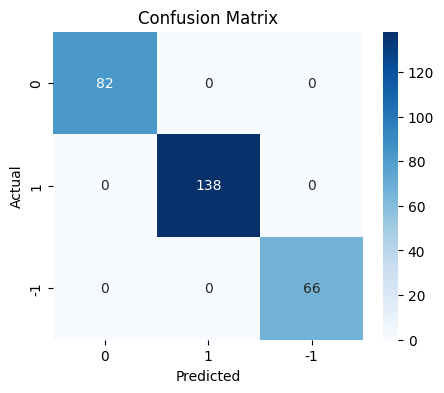

In [ ]:
plot_confusion_matrix(base_wv,X_train_wv,y_train)

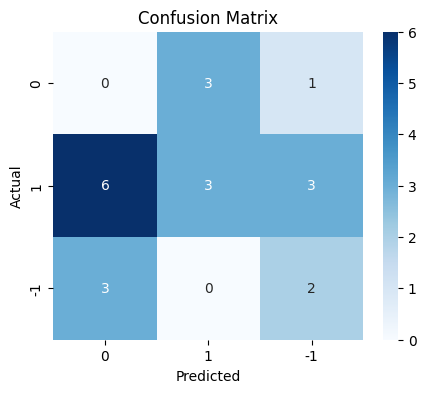

In [ ]:
plot_confusion_matrix(base_wv,X_val_wv,y_val)

In [ ]:
#Calculating different metrics on training data
base_train_wv = model_performance_classification_sklearn(base_wv,X_train_wv,y_train)
print("Training performance:\n", base_train_wv)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
#Calculating different metrics on validation data
base_val_wv = model_performance_classification_sklearn(base_wv,X_val_wv,y_val)
print("Validation performance:\n",base_val_wv)

Validation performance:
    Accuracy    Recall  Precision        F1
0  0.238095  0.238095   0.365079  0.277056


# Observations


Word2vec base model has low scores on validation data. Overall, not directly usable.



### Base Model - GloVe

In [ ]:
#Building the model

base_gl = GradientBoostingClassifier(random_state = 42)
base_gl = RandomForestClassifier(random_state=42)
base_gl = DecisionTreeClassifier(random_state=42)

# Fitting on train data
base_gl.fit(X_train_gl, y_train) #Complete the code to fit the chosen model on the train data

DecisionTreeClassifier(random_state=42)

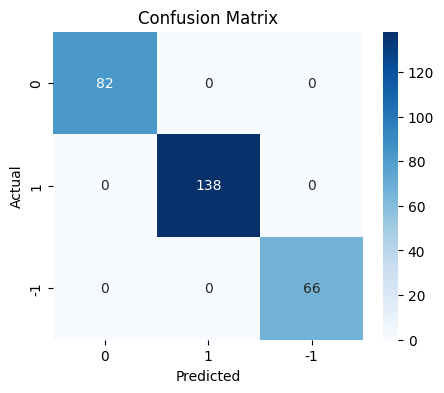

In [ ]:
plot_confusion_matrix(base_gl,X_train_gl,y_train) #Complete the code to plot the confusion matrix for the train data

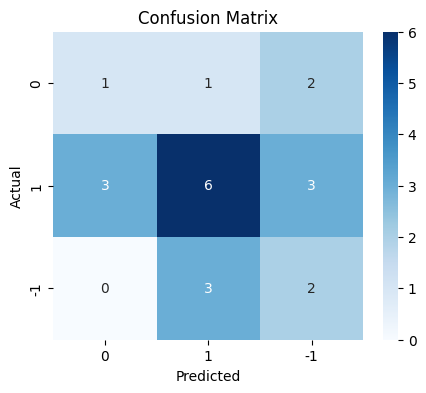

In [ ]:
plot_confusion_matrix(base_gl,X_val_gl,y_val) #Complete the code to plot the confusion matrix for the validation data

In [ ]:
#Calculating different metrics on training data
base_train_gl=model_performance_classification_sklearn(base_gl,X_train_gl,y_train) #Complete the code to compute the model performance for the training data
print("Training performance:\n", base_train_gl)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
#Calculating different metrics on validation data
base_val_gl = model_performance_classification_sklearn(base_gl,X_val_gl,y_val) #Complete the code to compute the model performance for the validation data
print("Validation performance:\n",base_val_gl)

Validation performance:
    Accuracy    Recall  Precision        F1
0  0.428571  0.428571   0.458503  0.438672


### Base Model - Sentence Transformer

In [ ]:
# Building the model

base_st = GradientBoostingClassifier(random_state = 42)
base_st = RandomForestClassifier(random_state=42)
base_st = DecisionTreeClassifier(random_state=42)

# Fitting on train data
base_st.fit(X_train_st, y_train)

DecisionTreeClassifier(random_state=42)

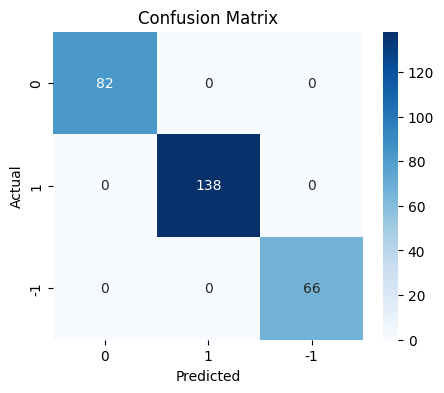

In [ ]:
plot_confusion_matrix(base_st,X_train_st,y_train) #Complete the code to plot the confusion matrix for the train data

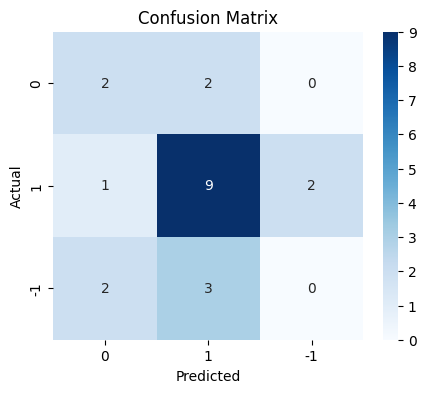

In [ ]:
plot_confusion_matrix(base_st,X_val_st,y_val) #Complete the code to plot the confusion matrix for the validation data

In [ ]:
#Calculating different metrics on training data
base_train_st=model_performance_classification_sklearn(base_st,X_train_st,y_train)
print("Training performance:\n", base_train_st)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
#Calculating different metrics on validation data
base_val_st = model_performance_classification_sklearn(base_st, X_val_st, y_val)
print("Validation performance:\n",base_val_st)

Validation performance:
    Accuracy   Recall  Precision       F1
0   0.52381  0.52381   0.443537  0.48026


## Observations

Base GloVe model has about 50% recall, and overall performs twice as well on the validation data as the Base Word2Vec model.

### Tuned Model - Word2Vec

**Note**: The parameter grid provided below is a sample grid. It can be modified depending on the compute power of the system being used.

In [ ]:
start = time.time()

# Choose the type of classifier.

tuned_wv = GradientBoostingClassifier(random_state = 42)
tuned_wv = RandomForestClassifier(random_state=42)
tuned_wv = DecisionTreeClassifier(random_state=42)


parameters = {
    'max_depth': np.arange(3,7),
    'min_samples_split': np.arange(5,12,2),
    'max_features': ['log2', 'sqrt', 0.2, 0.4]
}

# Run the grid search
grid_obj = GridSearchCV(tuned_wv, parameters, scoring='f1_weighted',cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train_wv, y_train)

end = time.time()
print("Time taken ",(end-start))

# Set the clf to the best combination of parameters
tuned_wv = grid_obj.best_estimator_

Time taken  10.877264976501465


In [ ]:
# Fit the best algorithm to the data.
tuned_wv.fit(X_train_wv, y_train)

DecisionTreeClassifier(max_depth=6, max_features='sqrt', min_samples_split=5,
                       random_state=42)

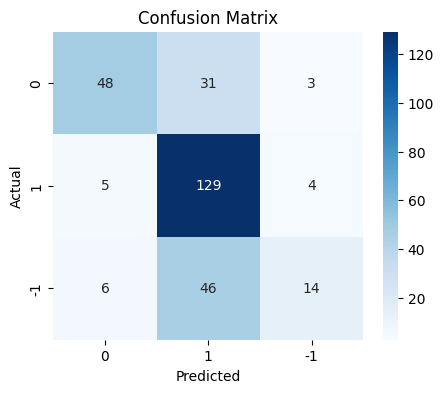

In [ ]:
plot_confusion_matrix(tuned_wv,X_train_wv,y_train)

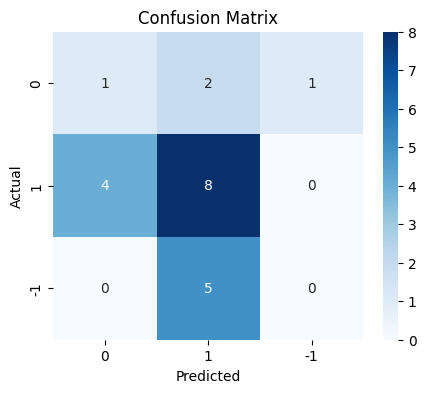

In [ ]:
plot_confusion_matrix(tuned_wv,X_val_wv,y_val)

In [ ]:
#Calculating different metrics on training data
tuned_train_wv=model_performance_classification_sklearn(tuned_wv,X_train_wv,y_train)
print("Training performance:\n",tuned_train_wv)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.667832  0.667832   0.689263  0.631368


In [ ]:
#Calculating different metrics on validation data
tuned_val_wv = model_performance_classification_sklearn(tuned_wv,X_val_wv,y_val)
print("Validation performance:\n",tuned_val_wv)

Validation performance:
    Accuracy    Recall  Precision        F1
0  0.428571  0.428571   0.342857  0.380952


# Observations

1. Unlike the base models, this model did not overfit on training data.
2. Performance on validation data better than base Word2vec but lower than base GloVe model.

### Tuned Model - GloVe

In [ ]:
start = time.time()


tuned_gl = GradientBoostingClassifier(random_state = 42)
tuned_gl = RandomForestClassifier(random_state=42)
tuned_gl = DecisionTreeClassifier(random_state=42)

parameters = {
    'max_depth': np.arange(3,7),
    'min_samples_split': np.arange(5,12,2),
    'max_features': ['log2', 'sqrt', 0.2, 0.4]
}

# Run the grid search
grid_obj = GridSearchCV(tuned_gl, parameters, scoring='f1_weighted',cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train_gl, y_train)

end = time.time()
print("Time taken ",(end-start))

# Set the clf to the best combination of parameters
tuned_gl = grid_obj.best_estimator_

Time taken  2.5366480350494385


In [ ]:
# Fit the best algorithm to the data.
tuned_gl.fit(X_train_gl, y_train) #Complete the code to fit the chosen model on the train data

DecisionTreeClassifier(max_depth=4, max_features='log2', min_samples_split=5,
                       random_state=42)

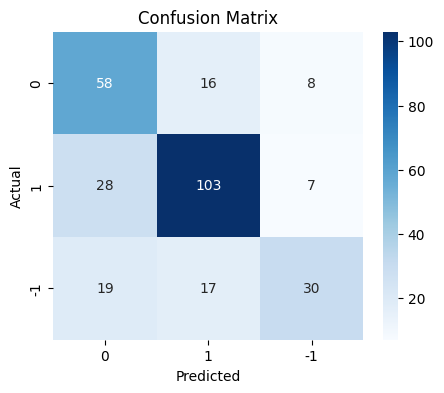

In [ ]:
plot_confusion_matrix(tuned_gl,X_train_gl,y_train) #Complete the code to plot the confusion matrix for the train data

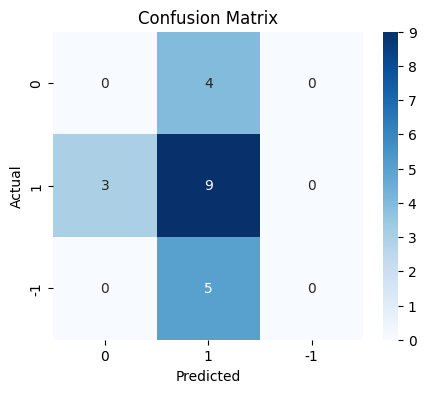

In [ ]:
plot_confusion_matrix(tuned_gl,X_val_gl,y_val)

In [ ]:
#Calculating different metrics on training data
tuned_train_gl=model_performance_classification_sklearn(tuned_gl,X_train_gl,y_train)
print("Training performance:\n",tuned_train_gl)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.667832  0.667832   0.677657  0.665363


In [ ]:
#Calculating different metrics on validation data
tuned_val_gl = model_performance_classification_sklearn(tuned_gl,X_val_gl,y_val)
print("Validation performance:\n",tuned_val_gl)

Validation performance:
    Accuracy    Recall  Precision        F1
0  0.428571  0.428571   0.285714  0.342857


## Observations

1. Like the tuned Word2vec model, not overfitting as much on training data as the base models.
2. Similar recall like the tuned Word2vec model, but lower precision.

### Tuned Model - Sentence Transformer

In [ ]:
start = time.time()

# Choose the type of classifier.

tuned_st = GradientBoostingClassifier(random_state = 42)
tuned_st = RandomForestClassifier(random_state=42)
tuned_st = DecisionTreeClassifier(random_state=42)

parameters = {
    'max_depth': np.arange(3,7),
    'min_samples_split': np.arange(5,12,2),
    'max_features': ['log2', 'sqrt', 0.2, 0.4]
}

# Run the grid search
grid_obj = GridSearchCV(tuned_st, parameters, scoring='f1_weighted',cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train_st, y_train)

end = time.time()
print("Time taken ",(end-start))

# Set the clf to the best combination of parameters
tuned_st = grid_obj.best_estimator_

Time taken  4.596750020980835


In [ ]:
# Fit the best algorithm to the data.
tuned_st.fit(X_train_st, y_train) #Complete the code to fit the chosen model on the train data

DecisionTreeClassifier(max_depth=6, max_features='log2', min_samples_split=7,
                       random_state=42)

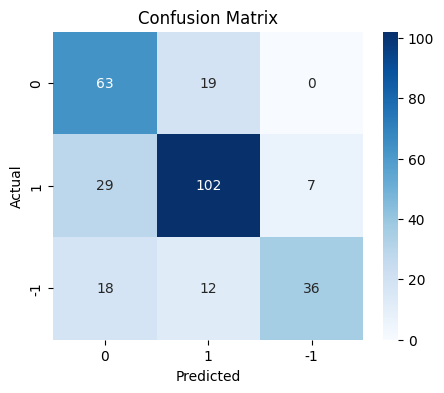

In [ ]:
plot_confusion_matrix(tuned_st,X_train_st,y_train)

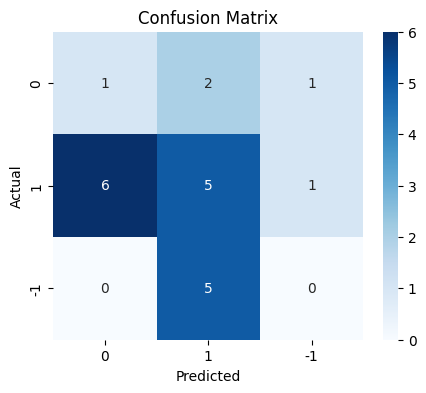

In [ ]:
plot_confusion_matrix(tuned_st,X_val_st,y_val)

In [ ]:
#Calculating different metrics on training data
tuned_train_st=model_performance_classification_sklearn(tuned_st,X_train_st,y_train)
print("Training performance:\n",tuned_train_st)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.702797  0.702797   0.727462  0.703814


In [ ]:
#Calculating different metrics on validation data
tuned_val_st = model_performance_classification_sklearn(tuned_st,X_val_st,y_val)
print("Validation performance:\n",tuned_val_st)

Validation performance:
    Accuracy    Recall  Precision        F1
0  0.285714  0.285714   0.265306  0.272727


## Observations

1. Higher overfitting since much larger drop between train and validation of the different tuned models.
2. Overall, pretty poor scores.

### Model Performance Summary and Final Model Selection

In [ ]:
#training performance comparison

models_train_comp_df = pd.concat(
    [base_train_wv.T,
     base_train_gl.T,
     base_train_st.T,
     tuned_train_wv.T,
     tuned_train_gl.T,
     tuned_train_st.T,
    ],axis=1
)

models_train_comp_df.columns = [
    "Base Model (Word2Vec)",
    "Base Model (GloVe)",
    "Base Model (Sentence Transformer)",
    "Tuned Model (Word2Vec)",
    "Tuned Model (GloVe)",
    "Tuned Model (Sentence Transformer)",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Base Model (Word2Vec),Base Model (GloVe),Base Model (Sentence Transformer),Tuned Model (Word2Vec),Tuned Model (GloVe),Tuned Model (Sentence Transformer)
Accuracy,1.0,1.0,1.0,0.667832,0.667832,0.702797
Recall,1.0,1.0,1.0,0.667832,0.667832,0.702797
Precision,1.0,1.0,1.0,0.689263,0.677657,0.727462
F1,1.0,1.0,1.0,0.631368,0.665363,0.703814


In [ ]:
#validation performance comparison

models_val_comp_df = pd.concat(
    [base_val_wv.T,
     base_val_gl.T,
     base_val_st.T,
     tuned_val_wv.T,
     tuned_val_gl.T,
     tuned_val_st.T,
     ],axis=1
)

models_val_comp_df.columns = [
    "Base Model (Word2Vec)",
    "Base Model (GloVe)",
    "Base Model (Sentence Transformer)",
    "Tuned Model (Word2Vec)",
    "Tuned Model (GloVe)",
    "Tuned Model (Sentence Transformer)",
]

print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Base Model (Word2Vec),Base Model (GloVe),Base Model (Sentence Transformer),Tuned Model (Word2Vec),Tuned Model (GloVe),Tuned Model (Sentence Transformer)
Accuracy,0.238095,0.428571,0.523810,0.428571,0.428571,0.285714
Recall,0.238095,0.428571,0.523810,0.428571,0.428571,0.285714
Precision,0.365079,0.458503,0.443537,0.342857,0.285714,0.265306
F1,0.277056,0.438672,0.480260,0.380952,0.342857,0.272727


# Observations

1. To recap, the base models completely overfit on the training data compared to the tuned models.
2. However, the performance on validation data confirms that **Base Model (Sentence transformer)** is the best of the evaluated models.
3. Hence, using **Base Model (Sentence transformer)** for the final evaluation.

### Model Performance Check on Test Data

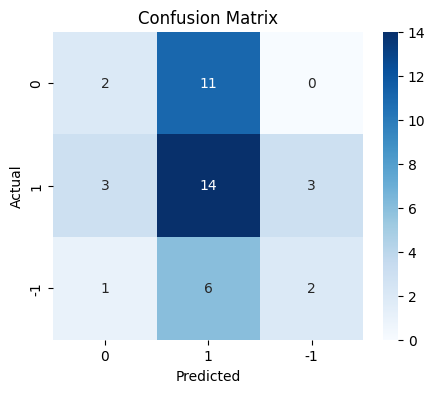

In [ ]:
plot_confusion_matrix(base_st,X_test_st,y_test)

In [ ]:
#Calculating different metrics on training data
final_model_test = model_performance_classification_sklearn(base_st,X_test_st,y_test)
print("Test performance for the final model:\n",final_model_test)

Test performance for the final model:
    Accuracy    Recall  Precision        F1
0  0.428571  0.428571   0.403943  0.387825


# Observations

1. Drop from validation to test data.
2. Overall F1 score of 0.38 and recall of 0.42.
3. While this model can be deployed, it should only be used as an additional data point, and should not be solely relied on for investment decisions.

## **Weekly News Summarization**

#### Installing and Importing the necessary libraries

In [ ]:
# Installation for GPU llama-cpp-python
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.85 --force-reinstall --no-cache-dir -q


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 39.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 142.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 257.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 232.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 264.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.5 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.


In [ ]:
# Function to download the model from the Hugging Face model hub
from huggingface_hub import hf_hub_download

# Importing the Llama class from the llama_cpp module
from llama_cpp import Llama

# Importing the library for data manipulation
import pandas as pd

from tqdm import tqdm # For progress bar related functionalities
tqdm.pandas()

#### Loading the data

In [ ]:
stock_news = pd.read_csv("stock_news.csv")

In [ ]:
data = stock_news.copy()

#### Loading the model

In [ ]:
model_name_or_path = "TheBloke/Mistral-7B-Instruct-v0.2-GGUF"
model_basename = "mistral-7b-instruct-v0.2.Q6_K.gguf"


model_path = hf_hub_download(
    repo_id="TheBloke/Mistral-7B-Instruct-v0.2-GGUF",
    filename="mistral-7b-instruct-v0.2.Q6_K.gguf"
)

mistral-7b-instruct-v0.2.Q6_K.gguf:   0%|          | 0.00/5.94G [00:00<?, ?B/s]

In [ ]:

llm = Llama(
    model_path=model_path, # Path to the model
    n_gpu_layers=100, #Number of layers transferred to GPU
    n_ctx=4500, #Context window
)

AVX = 1 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | SSSE3 = 1 | VSX = 0 | 


#### Aggregating the data weekly

In [ ]:
data["Date"] = pd.to_datetime(data['Date'])  # Convert the 'Date' column to datetime format.

In [ ]:
# Group the data by week using the 'Date' column.
weekly_grouped = data.groupby(pd.Grouper(key='Date', freq='W'))

In [ ]:
# Aggregate the grouped data on a weekly basis:
# concatenate 'content' values into a single string separated by ' || '.
weekly_grouped = weekly_grouped.agg(
    {
        'News': lambda x: ' || '.join(x)  # Join the news values with ' || ' separator.
    }
).reset_index()

print(weekly_grouped.shape)

(18, 2)


In [ ]:
weekly_grouped

,Date,News
0,2019-01-06,The tech sector experienced a significant dec...
1,2019-01-13,Sprint and Samsung plan to release 5G smartph...
2,2019-01-20,The U.S. stock market declined on Monday as c...
3,2019-01-27,"The Swiss National Bank (SNB) governor, Andre..."
4,2019-02-03,Caterpillar Inc reported lower-than-expected ...
5,2019-02-10,"The Dow Jones Industrial Average, S&P 500, an..."
6,2019-02-17,"This week, the European Union's second highes..."
7,2019-02-24,This news article discusses progress towards ...
8,2019-03-03,The Dow Jones Industrial Average and other ma...
9,2019-03-10,"Spotify, the world's largest paid music strea..."


In [ ]:
# creating a copy of the data
data_1 = weekly_grouped.copy()

#### Summarization

##### Utility Functions

In [ ]:
# defining a function to parse the JSON output from the model
def extract_json_data(json_str):
    import json
    try:
        # Find the indices of the opening and closing curly braces
        json_start = json_str.find('{')
        json_end = json_str.rfind('}')

        if json_start != -1 and json_end != -1:
            extracted_category = json_str[json_start:json_end + 1]  # Extract the JSON object
            data_dict = json.loads(extracted_category)
            return data_dict
        else:
            print(f"Warning: JSON object not found in response: {json_str}")
            return {}
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return {}

##### Defining the response function

In [ ]:

# Defining the response function
def response_mistral_1(prompt, news):
    model_output = llm(
        f"""
        [INST]
        {prompt}
        News Articles: {news}
        [/INST]
        """,
        max_tokens=256,       # enough for short structured JSON responses
        temperature=0.7,      # balance between randomness and coherence
        top_p=0.9,            # nucleus sampling
        top_k=50,             # top-k sampling
        echo=False,
    )

    final_output = model_output["choices"][0]["text"]
    return final_output

##### Checking the model output on a sample

In [ ]:
news = data_1.loc[0, 'News']

In [ ]:
print(len(news.split(' ')))
news

2611


' The tech sector experienced a significant decline in the aftermarket following Apple\'s Q1 revenue warning. Notable suppliers, including Skyworks, Broadcom, Lumentum, Qorvo, and TSMC, saw their stocks drop in response to Apple\'s downward revision of its revenue expectations for the quarter, previously announced in January. ||  Apple lowered its fiscal Q1 revenue guidance to $84 billion from earlier estimates of $89-$93 billion due to weaker than expected iPhone sales. The announcement caused a significant drop in Apple\'s stock price and negatively impacted related suppliers, leading to broader market declines for tech indices such as Nasdaq 10 ||  Apple cut its fiscal first quarter revenue forecast from $89-$93 billion to $84 billion due to weaker demand in China and fewer iPhone upgrades. CEO Tim Cook also mentioned constrained sales of Airpods and Macbooks. Apple\'s shares fell 8.5% in post market trading, while Asian suppliers like Hon ||  This news article reports that yields o

In [ ]:
#Prompt
prompt = """
You are an expert data analyst specializing in news content analysis.

Task: Analyze the provided news headline and return the main topics contained within it.

Instructions:
1. Read the news headline carefully.
2. Identify the main subjects or entities mentioned in the headline.
3. Determine the key events or actions described in the headline.
4. Extract relevant keywords that represent the topics.
5. List the topics in a concise manner.

Return the output in JSON format with keys as the topic number and values as the actual topic.

Example Output:
{
  "1": "Politics",
  "2": "Economy",
  "3": "Health"
}
"""

In [ ]:
%%time
summary = response_mistral_1(prompt, news)
print(summary)

 {
          "1": ["Tech sector", "Apple", "Stock market"],
          "2": ["Economy", "Global economic slowdown", "USD JPY pair", "Japanese yen", "US Treasury securities"],
          "3": ["China", "Trade tensions"]
         }
CPU times: user 11.9 s, sys: 4.68 s, total: 16.6 s
Wall time: 17.6 s


##### Checking the model output on the weekly data

In [ ]:
%%time
data_1['Key Events'] = data_1['News'].progress_apply(lambda x: response_mistral_1(prompt,x))

100%|██████████| 18/18 [04:17<00:00, 14.30s/it]

CPU times: user 3min 43s, sys: 23.1 s, total: 4min 6s
Wall time: 4min 17s


In [ ]:
data_1.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max
Date,18,NaN,NaN,NaN,2019-03-06 12:00:00,2019-01-06 00:00:00,2019-02-04 18:00:00,2019-03-06 12:00:00,2019-04-05 06:00:00,2019-05-05 00:00:00
News,18,18,The tech sector experienced a significant dec...,1,NaN,NaN,NaN,NaN,NaN,NaN
Key Events,18,18,"{\n ""1"": [""Tech sector"", ""Apple"", ""i...",1,NaN,NaN,NaN,NaN,NaN,NaN


##### Formatting the model output

In [ ]:
data_1['model_response_parsed'] = data_1['Key Events'].apply(extract_json_data)
data_1.head()

          "1": ["Swiss National Bank", "Andrea Maechler", "Negative interest rates", "Foreign currency market intervention", "Deflation"],
          "2": ["The Dow", "S&P 500", "Nasdaq", "White House economic adviser Lawrence Kudlow", "Trade talks between the U.S. and China", "International Monetary Fund", "Global growth"],
          "3": ["IBM", "Cloud computing business", "Earnings", "Revenue"],
          "4": ["Huawei", "New Honor View20 smartphone", "Advanced camera features", "Competition with Samsung and Apple"],
          "5": ["Foxconn", "Recruitment of employees", "Mass layoffs"],
          "6": ["Amazon", "Long-awaited direct fulfillment and delivery network in Brazil", "Merchandise from 800 suppliers"],
          "7": ["Tesla", "New Shanghai electric car factory", "Battery supplier Tianjin Lishen"],
          "8": ["TomTom", "Sale of fleet management business to
          "1": ["European Union", "Belgian tax break", "Apple", "Starbucks", "Fiat Chrysler", "EU Commission"],
  

,Date,News,Key Events,model_response_parsed
0,2019-01-06,The tech sector experienced a significant dec...,"{\n ""1"": [""Tech sector"", ""Apple"", ""i...","{'1': ['Tech sector', 'Apple', 'iPhone sales',..."
1,2019-01-13,Sprint and Samsung plan to release 5G smartph...,"{\n ""1"": [""Technology"", ""5G"", ""Smartp...","{'1': ['Technology', '5G', 'Smartphones'], '2'..."
2,2019-01-20,The U.S. stock market declined on Monday as c...,"{\n ""1"": [""U.S. stock market"", ""Chin...","{'1': ['U.S. stock market', 'Chinese exports a..."
3,2019-01-27,"The Swiss National Bank (SNB) governor, Andre...","{\n ""1"": [""Swiss National Bank"", ""An...",{}
4,2019-02-03,Caterpillar Inc reported lower-than-expected ...,"{\n ""1"": [""Apple"", ""Caterpillar Inc""...","{'1': ['Apple', 'Caterpillar Inc', 'Facebook',..."


In [ ]:
model_response_parsed = pd.json_normalize(data_1['model_response_parsed'])
model_response_parsed.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,"[Tech sector, Apple, iPhone sales, Revenue war...","[Economy, Global economic slowdown, China's ec...","[Finance, U.S. Treasury securities, Yields]","[Currencies, Japanese yen, Automated selling, ...","[Stock markets, Volatility, Fears of global ec...","[Earnings, Company profits, Rate cuts]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[Technology, 5G, Smartphones]","[Stock Market, Apple, Amazon]","[Economy, Trade War, China]","[Technology, Sensor, AMS]","[Company, Deutsche Bank, Vivendi]","[Automotive Industry, Mercedes Benz, German Ma...","[Stock Market, Trade Talks, US-China]","[Technology, Roku]","[Company, Nike]","[Company, Foxconn]","[Retail Industry, Apple, China]","[Banking Sector, Green Dot]","[Economy, Recession]"
2,"[U.S. stock market, Chinese exports and import...","[Technology stocks, Philadelphia SE Semiconduc...","[European stock market rally, Luxury retailers...","[Apple Music subscriptions, Verizon partnership]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[Apple, Caterpillar Inc, Facebook, Google, Did...","[Earnings report, Revenue decline, Trade tensi...","[Technology, Company news, China's economy, St...","[FaceTime bug, iPhone sales, Earnings expectat...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Renaming only the desired columns instead of all
final_output = pd.concat([data_1.reset_index(drop=True), model_response_parsed], axis=1)
final_output.drop(['Key Events', 'model_response_parsed'], axis=1, inplace=True)
final_output = final_output[['Date', 'News', '1', '2']]  # Selecting the desired columns
final_output.columns = ['Week End Date', 'News', 'Week Positive Events', 'Week Negative Events']  # Renaming

final_output.head()

,Week End Date,News,Week Positive Events,Week Negative Events
0,2019-01-06,The tech sector experienced a significant dec...,"[Tech sector, Apple, iPhone sales, Revenue war...","[Economy, Global economic slowdown, China's ec..."
1,2019-01-13,Sprint and Samsung plan to release 5G smartph...,"[Technology, 5G, Smartphones]","[Stock Market, Apple, Amazon]"
2,2019-01-20,The U.S. stock market declined on Monday as c...,"[U.S. stock market, Chinese exports and import...","[Technology stocks, Philadelphia SE Semiconduc..."
3,2019-01-27,"The Swiss National Bank (SNB) governor, Andre...",NaN,NaN
4,2019-02-03,Caterpillar Inc reported lower-than-expected ...,"[Apple, Caterpillar Inc, Facebook, Google, Did...","[Earnings report, Revenue decline, Trade tensi..."


## **Conclusions and Recommendations**

 1. Use Transformer-Based Sentiment Analysis
Recommendation: Deploy Sentence Transformer-based model for real-time or batch sentiment scoring of financial news. Performed the best across the model evaluation.

2. Avoid Premature Hyperparameter Tuning
Recommendation: Tuning with limited validation data may reduce performance.

3. Integrate Into Investment Strategy Carefully
With ~42% accuracy and ~38% F1, the model is better than chance, but not perfect. Combine with other signals (technical indicators, analyst ratings, etc.) for multi-factor investment decisions.

4. Future Improvements
Use more labeled data further train and improve the model — current set is small.

-



In [ ]:
#Convert to html

%%shell
jupyter nbconvert --to html /content/NLP_Project_Karthik_Garimella.ipynb

[NbConvertApp] Converting notebook /content/NLP_Project_Karthik_Garimella.ipynb to html
Traceback (most recent call last):
  File "/usr/local/bin/jupyter-nbconvert", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/jupyter_core/application.py", line 283, in launch_instance
    super().launch_instance(argv=argv, **kwargs)
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/nbconvert/nbconvertapp.py", line 420, in start
    self.convert_notebooks()
  File "/usr/local/lib/python3.11/dist-packages/nbconvert/nbconvertapp.py", line 597, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "/usr/local/lib/python3.11/dist-packages/nbconvert/nbconvertapp.py", line 563, in convert_single_notebook
    output, resources = self.export_single_notebook(
                        ^^^^^^^^^^^^^^^^

CalledProcessError: Command 'jupyter nbconvert --to html /content/NLP_Project_Karthik_Garimella.ipynb
' returned non-zero exit status 1.

<font size=6 color='blue'>Power Ahead</font>
___